## Dataset

This dataset has two sets of files. Each set has two files.

 1. **Power Generation Data:** Data collected by inverters at inverter level
 
 2. **Weather Data:** Weather data collected by sensors at plant level

## Power Generation Dataset

 `DATE_TIME:` 15 minutes timestamp for a 34 day period
 
 `PLANT_ID:` Each plant has its unique ID that remains constant  
 
 `SOURCE_KEY:` Unique ID for each inverter
 
 `DC_POWER:` DC power received by an inverter for a timestamp
 
 `AC_POWER:` DC power converted to AC power by an inverter for a timestamp
 
 `DAILY_YIELD:` Cummulative sum of power generated, on a day, till that point of time
 
 `TOTAL_YIELD:` Total yield for an inverter till that point of time
        

## Weather Dataset

 `DATE_TIME:` 15 minutes timestamp for a 34 day period
 
 `PLANT_ID:` Each plant has its unique ID that remains constant  
 
 `SOURCE_KEY:` Unique ID for sensor
 
 `AMBIENT_TEMPERATURE:` Ambient temperature at the plant
 
 `MODULE_TEMPERATURE:` Temperature of the module (solar panel)
 
 `IRRADIATION:` Amount of irradiation for a timestamp

## Dependencies

In [8]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

In [78]:
# Dataset

## Plant Generation Data
df_gen = pd.read_csv('Plant_2_Generation_Data.csv')

## Weather Data
df_wthr = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [10]:
df_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [11]:
df_wthr.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


## Data Description and Overview

In [12]:
df_gen.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


Solar panels generate DC power however our systems run on AC power so when the DC power is converted to AC power, some part of it is lost due to losses in conversion. Therefore, AC power is lower than the DC power.

In [14]:
df_wthr.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


There is a big difference between the 75th percentile and the maximum values of both ambient and module temperature. This indicates that the distribution is positively skewed.

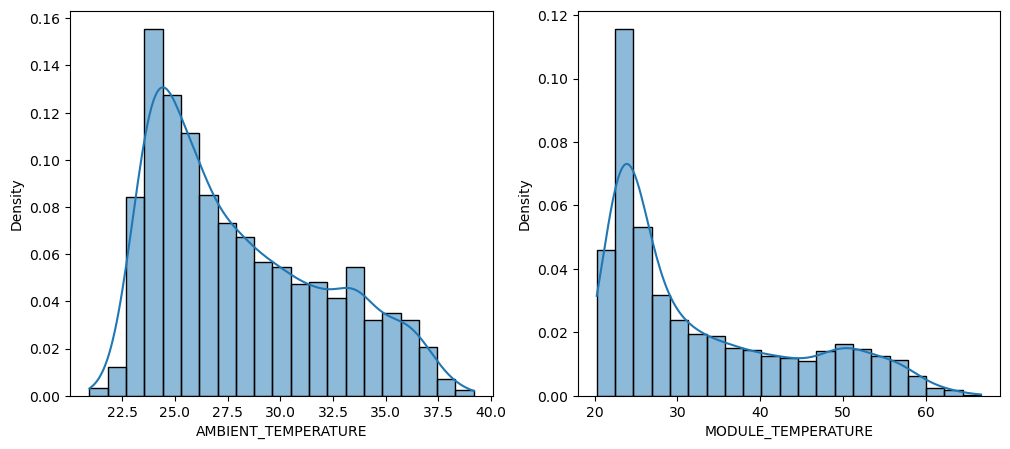

In [51]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df_wthr.AMBIENT_TEMPERATURE, kde= True, stat = 'density',ax = ax1)
sns.histplot(df_wthr.MODULE_TEMPERATURE, kde= True, stat = 'density',ax = ax2)
plt.show()

These distributions illustrate that the ambient temperature rarely go above 35.

The higher temperature value would be during the day time on a bright sunny day and the lower value point out either night time
or a cloudy day.

Also, if we take a look at the left figure we can see that the most common temperature value is between 23-24, and then there is
a bump at around 33-34 degrees. Both these facts indicate shorter solar hours.

In [55]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [56]:
df_wthr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


## Data Manipulation

In [73]:
# Missing value information
print('No. of unique plant IDs (gen data):', df_gen.PLANT_ID.nunique())
print('No. of unique plant IDs (weather data):', df_wthr.PLANT_ID.nunique())
print('No. of (unique) invertors:', df_gen.SOURCE_KEY.nunique())
print('No. of sensors for weather data:', df_wthr.SOURCE_KEY.nunique())
print(f'\nMissing/Null values in generation dataset\n\n{df_gen.isnull().sum()}')
print(f'\nMissing/Null values in weather dataset\n\n{df_wthr.isnull().sum()}')

No. of unique plant IDs (gen data): 1
No. of unique plant IDs (weather data): 1
No. of (unique) invertors: 22
No. of sensors for weather data: 1

Missing/Null values in generation dataset

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

Missing/Null values in weather dataset

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


1. The plant id is the same for all the observations in both dataset.

2. The source key is same for all the observations in weather dataset which shows that all the readings have been taken by a single sensor. The source key for this dataset can be dropped.

3. There are a total of 22 different source key in generation dataset and each source key represent a different inverter in this
plant.

4. There are no missing values in either of the dataset.

5. As the aim of this project is to predict genreation so we can drop the daily yield and total yield columns as well. These 
columns might be interesting for tasks like fault detection and maintenance predictions but not for our task.

In [91]:
# Dropping ineffective columns
df_gen.drop('PLANT_ID', axis = 1,inplace = True)
df_wthr.drop('PLANT_ID', axis = 1,inplace = True)
df_wthr.drop('SOURCE_KEY',axis =1, inplace = True)

# mapping the source key column in generation dataset
inv_lbl = {inv_name: inv_no for inv_no, inv_name in enumerate(df_gen.SOURCE_KEY.unique(),1)}
df_gen['INV_NUM'] = df_gen.SOURCE_KEY.map(inv_lbl)

df_gen.drop('SOURCE_KEY', axis=1, inplace = True)

df_gen = df_gen[['DATE_TIME', 'INV_NUM','DC_POWER','AC_POWER']]

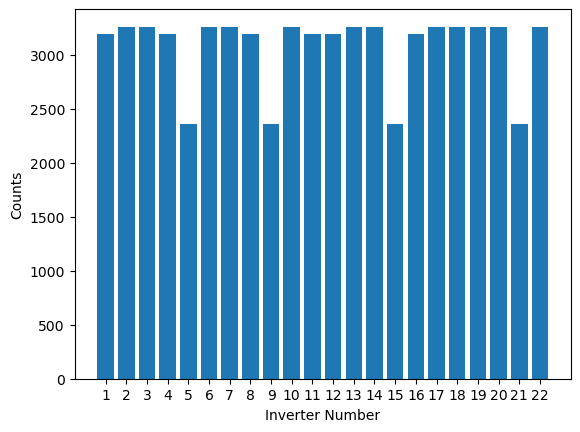

In [113]:
plt.bar(range(1,23), df_gen.groupby('INV_NUM')['DATE_TIME'].count())
plt.ylabel('Counts')
plt.xlabel('Inverter Number')
plt.xticks(range(1,23))
plt.show()

In [145]:
# count_lst = df_gen.groupby('INV_NUM')['DATE_TIME'].count().tolist()
# for i in range(1,len(count_lst)+1):
#     print(f'Inverter {i} has {count_lst[i-1]} timestamps')
min_val = df_gen.groupby('INV_NUM')['DATE_TIME'].count().min()
max_val = df_gen.groupby('INV_NUM')['DATE_TIME'].count().max()
print(f'\nThe minimum number of recorded observations are {min_val}')
print(f'The maximum number of recorded observations are {max_val}')
print(f'The difference between the maximum and minimum observations is {max_val - min_val}')


The minimum number of recorded observations are 2355
The maximum number of recorded observations are 3259
The difference between the maximum and minimum observations is 904


In [143]:
inv_counts = df_gen.groupby('INV_NUM')['DATE_TIME'].count().reset_index()
pd.crosstab(inv_counts['DATE_TIME'],inv_counts['INV_NUM'])

INV_NUM,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2355,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3195,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3259,0,1,1,0,0,1,1,0,0,1,...,1,1,0,0,1,1,1,1,0,1


Some inverters have more values and some have less. For our analysis, we need values from all the inverters for each timestamp.
We can either impute the missing values or remove the extra rows. Removing the excess rows will lead to loss of significant amount of valuable data so imputation of the missing values seem a better option.

Right now, the data is inverter-wise however we want it to be day-wise (timestamp wise) for our model. We want to sum the `AC_Power` and `DC_POWER` from all the inverters for each timestamp.